## This notebook shows how to open data files (produced in DD4Hep), and plot hit distributions. It uses awkard arrays. 

In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS")
import matplotlib.colors as mcolors


## Get data, transform into akward arrays

In [2]:
input_file = "../generate_data/to_hdf5/2M_piplus.root"
events = ur.open("%s:events"%(input_file))
#events.show()
#events.keys()
arrays = events.arrays(entry_start=100_000, entry_stop=200_000)

In [3]:
#events.keys()

## Hit postion distributions

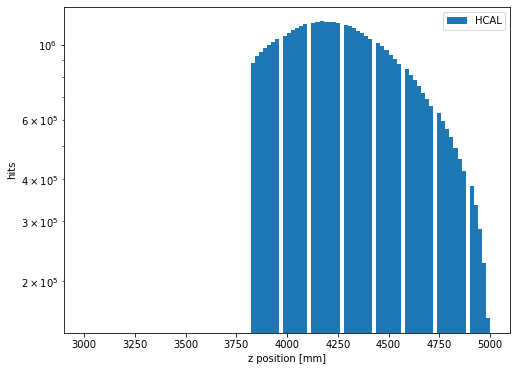

In [29]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.position.z']),bins=100, range=(3000,5000),label='HCAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.legend()
plt.show()

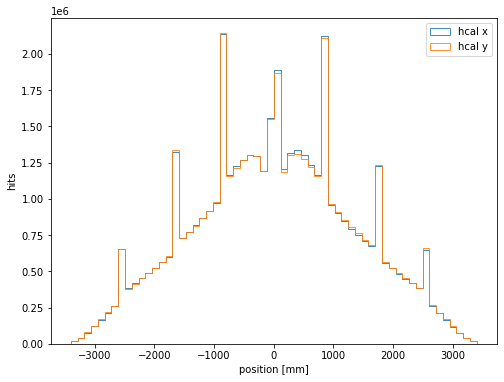

In [5]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60,label='hcal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

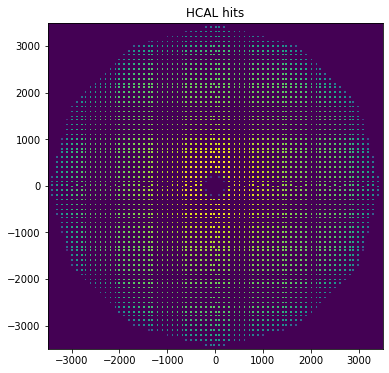

In [6]:
fig,ax = plt.subplots(1,1, figsize=(6, 6),sharex=True,sharey=True)
ax = [ax,ax]

x = ak.flatten(arrays['HcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))
ax[0].set_title('HCAL hits')

plt.show()

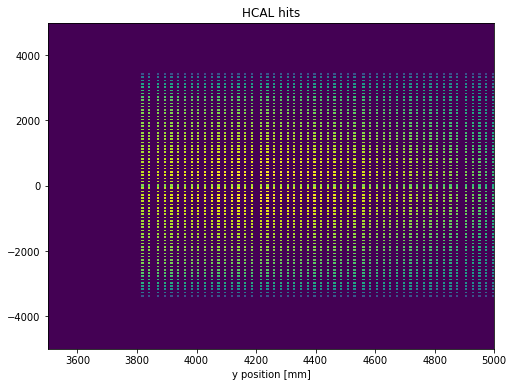

In [7]:
fig,ax = plt.subplots(1,1, figsize=(8, 6),sharex=True,sharey=True)
ax = [ax,ax]
#x = ak.flatten(arrays['EcalEndcapPHitsReco.position.z'])
#y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('z position [mm]')
ax[1].set_xlabel('y position [mm]')

ax[1].set_title('HCAL hits')

plt.show()

## Hit energy distributions

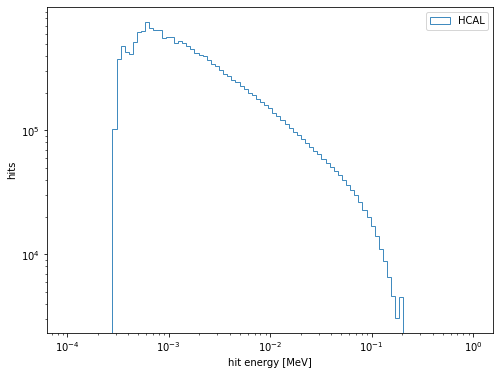

In [8]:
fig = plt.figure( figsize=(8, 6))
#plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [9]:
HCALhits = arrays['HcalEndcapPHitsReco.energy'][:,:]
mask = HCALhits<1e10
HCALhits = HCALhits[mask]
HCAL_total = ak.sum(HCALhits,axis=-1)
HCAL_average = ak.mean(HCALhits,axis=-1)
HCAL_nhits = ak.num(HCALhits)

print('total HCAL energy' , HCAL_total)
print('Average hit energy in HCAL' , HCAL_average)

total HCAL energy [0.794, 0.868, 1.91, 0.0782, 0.0161, 1.29, ... 1.8, 0.338, 1.73, 1.06, 0.247, 0.498]
Average hit energy in HCAL [0.00366, 0.00496, 0.0125, 0.00223, 0.000846, ... 0.00693, 0.0041, 0.00339, 0.00343]


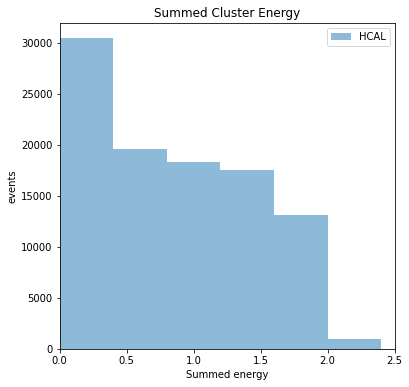

In [32]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_total,bins=100,alpha=0.5,range=(0,40),label='HCAL')
plt.title("Summed Cluster Energy")
plt.xlim(0,2.5)

plt.xlabel('Summed energy')
plt.ylabel('events')
plt.legend()

plt.show()


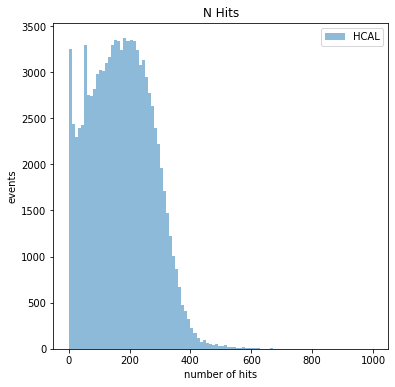

In [31]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='HCAL')
plt.title("N Hits")
plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [13]:
print(arrays['MCParticles.generatorStatus'])
get_status = ak.to_numpy(arrays['MCParticles.generatorStatus'][:,2])
pz = ak.to_numpy(arrays['MCParticles.momentum.z'][:,2])
py = ak.to_numpy(arrays['MCParticles.momentum.y'][:,2])
px = ak.to_numpy(arrays['MCParticles.momentum.x'][:,2])
mass = ak.to_numpy(arrays['MCParticles.mass'][:,2])

p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

[[4, 4, 1], [4, 4, 1], [4, 4, 1], [4, 4, ... 4, 4, 1, 0], [4, 4, 1, 0, 0], [4, 4, 1]]


In [14]:
print(np.any(get_status!=1))

False


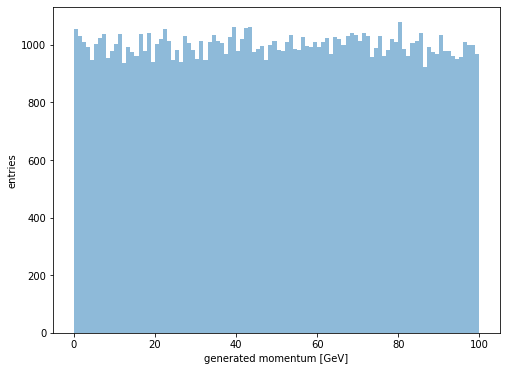

100000


In [15]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
#plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

In [19]:
mip_E = 0.00006 #minimum ionizing particle
spikey_E = 1e10
max_T = 200
GeV_to_MeV = 1000
min_cluster_E = .100 #GeV. HCAL SAMPLING FRACTION ASSUMED


e_array = arrays['HcalEndcapPHitsReco.energy']*GeV_to_MeV
    
hcal_time_mask = arrays['HcalEndcapPHitsReco.time'] < max_T
hcal_mip_mask = arrays['HcalEndcapPHitsReco.energy'] > mip_E
hcal_spike_mask = arrays['HcalEndcapPHitsReco.energy'] <= spikey_E
#hcal_min_sum_mask = ak.sum(e_array,axis=-1) < min_cluster_E

h_cell_cuts = [hcal_time_mask, hcal_spike_mask, hcal_mip_mask]

h_cell_mask = np.full(len(hcal_time_mask),True)

for h_cut in h_cell_cuts:
    h_cell_mask = np.logical_and(h_cell_mask,h_cut)
    

hcal_cluster_sum = ak.sum(arrays['HcalEndcapPHitsReco.energy'][h_cell_mask],axis=-1)
hcal_cluster_mask = hcal_cluster_sum > min_cluster_E

print(len(hcal_cluster_sum[hcal_cluster_mask]))

86938


In [20]:
print(ak.sum(e_array,axis=-1)) #Crap
print(hcal_cluster_sum[:10]) #Correct

[4.41e+19, 2.7e+19, 1.78e+19, 7.32e+18, ... 4.55e+19, 5.01e+19, 1.62e+19, 3.31e+19]
[0.783, 0.86, 1.91, 0.0746, 0.0152, 1.28, 0.0371, 0.0523, 2.13, 0.049]


### Apply Cluster Cuts

In [21]:
#minGenE = 0.5
#minSum = 0.0
#gen_code_keep = 1
#min_theta = 1.0

min_theta = 5.0 #5 for HCAL
max_theta = 30.0
gen_theta = np.arccos(pz/p)*180/np.pi

theta_mask = np.logical_and(gen_theta>min_theta, gen_theta<max_theta)
print(len(theta_mask))

event_mask = np.logical_and(theta_mask,hcal_cluster_mask)

#mask = np.logical_and(mask, genStat==gen_code_keep)
#print(genStat==gen_code_keep)

100000


In [22]:
np.save("ROOT_cluster_sum.npy",hcal_cluster_sum[event_mask])
np.save("ROOT_gen_E.npy",gen_E[event_mask])

Text(0.5, 1.0, 'Raw HCal Sum vs. $E_\\mathrm{Gen.}$')

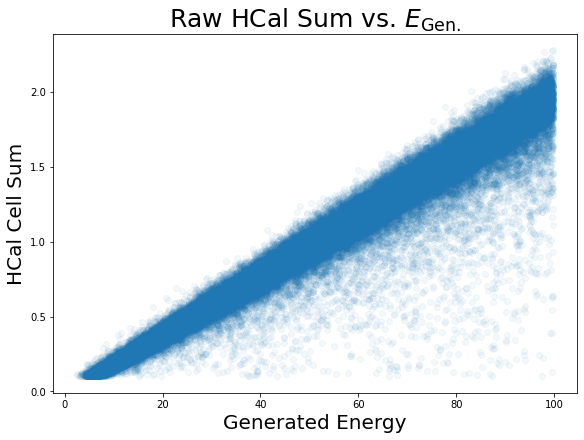

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), constrained_layout=True)
axes = [axes,axes]

axes[0].scatter(gen_E[event_mask],hcal_cluster_sum[event_mask],alpha=0.05)
axes[0].set_xlabel("Generated Energy",fontsize=20)
axes[0].set_ylabel("HCal Cell Sum",fontsize=20)
axes[0].set_title("Raw HCal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

### $\uparrow$ If above is empty, increase the alpha from 0.005!

Text(0.5, 1.0, '[ROOT] HCal Sum vs. Generated Energy')

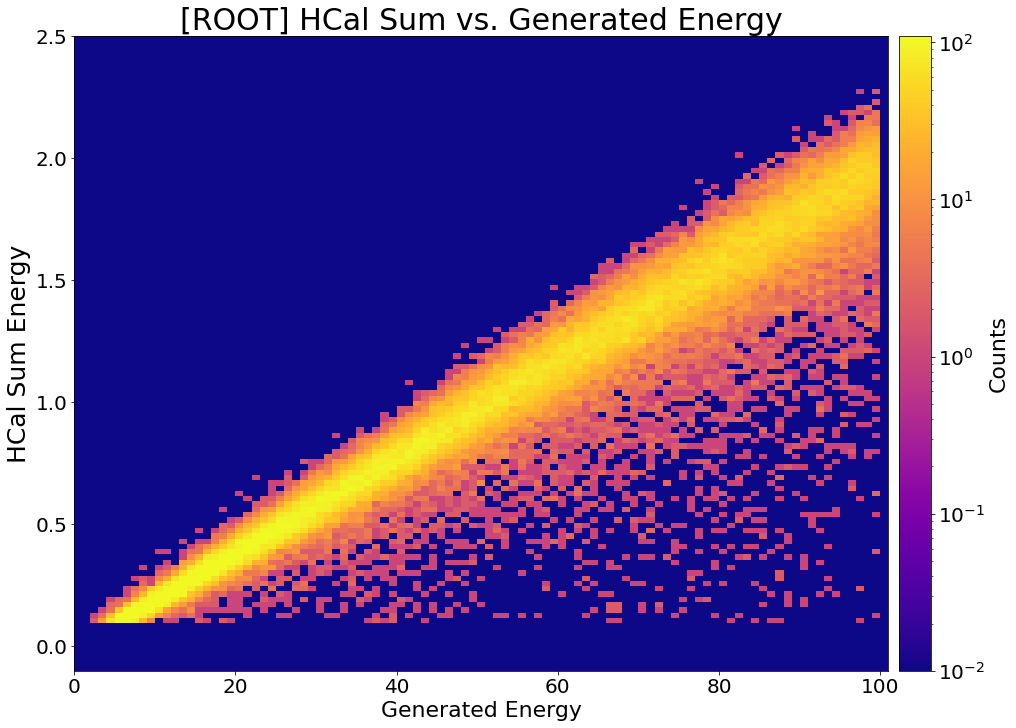

In [24]:
from copy import copy
from matplotlib.colors import LogNorm
fig, axes = plt.subplots(nrows=1, figsize=(14, 10), constrained_layout=True)
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))

cluster_edges=np.linspace(-0.1,2.5,121)
truth_edges=np.linspace(-10,110,121)
h, xedges, yedges = np.histogram2d(gen_E[event_mask],hcal_cluster_sum[event_mask], bins=[truth_edges, cluster_edges])
#xedges=yedges
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmin=1.0e-2,vmax=1.1e2), rasterized=True)
cb = fig.colorbar(pcm, ax=axes, pad=0)
cb.set_label("Counts",fontsize=22)
cb.ax.tick_params(labelsize=20)
axes.set_xlabel("Generated Energy",fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylim(-0.1,2.5)
plt.xlim(-0,101)
axes.set_ylabel("HCal Sum Energy",fontsize=25)
axes.set_title("[ROOT] HCal Sum vs. Generated Energy",fontsize=30)

In [25]:
def get_res_scale(truth,test,N_Bins=20,min=0,max=100):
    if (len(truth) != len(test)):
        print("truth and test arrays must be same length")
        return
    
    binning = np.linspace(min,max,N_Bins+1)
    indecies = np.digitize(truth,binning)-1
    max_count = np.bincount(indecies).max()
    slices = np.empty((N_Bins,max_count))
    slices.fill(np.nan)
    
    counter = np.zeros(N_Bins,int)
    avg_truth = np.zeros(N_Bins,float)
    test_over_truth = np.zeros(N_Bins,float)

    
    for i in range(len(test)):
        bin = indecies[i]
        slices[bin][counter[bin]] = test[i] #slices[bin, element inside bin]
        counter[bin]+=1
        avg_truth[bin]+=truth[i]
        test_over_truth[bin] += test[i]/truth[i]
        

    #Resoluton = stdev(pred)/avg_truth 
    avg_truth = avg_truth/counter
    test_stdev = np.nanstd(slices,axis=1)
    resolution = test_stdev/avg_truth

    #Scale = <test/truth>
    scale = test_over_truth/counter
    
    return resolution,scale,avg_truth,slices

In [26]:
N_Bins = 20
E_Bins = np.linspace(0,100,N_Bins+1)

strawman_res, strawman_scale, avg_truth, strawman_slices = get_res_scale(gen_E[event_mask],hcal_cluster_sum[event_mask])

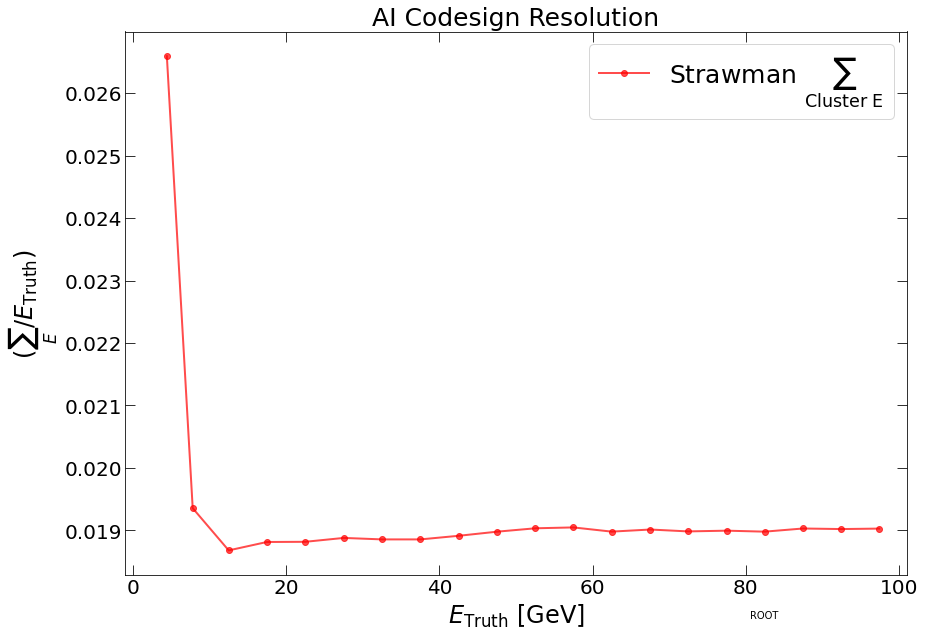

In [27]:
fig=plt.figure(figsize=(14,10))
plt.title("AI Codesign Resolution",fontsize=25)
plt.ylabel("$(\sum_E/E_\mathrm{Truth})$",fontsize=24)
plt.xlabel("$E_\mathrm{Truth}$ [GeV]",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
#plt.axhline(y=1.0, color='r', linestyle='--',alpha=0.5)#plt.ylim(-0.02,0.4)
#plt.ylim(0.5,1.5)
plt.xlim(-1,101)
#errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred
ax = plt.subplot(1,1,1)
first_bin = 0
last_bin = N_Bins

#Strawman
scale = strawman_scale[int(len(strawman_scale)/2)] #Scale to mid point, what NN should learn
scale=1.0
plt.errorbar(avg_truth[first_bin:last_bin],strawman_scale[first_bin:last_bin]/scale,
             linestyle="-",linewidth=2.0,capsize=4,capthick=1.2,elinewidth=1.2,ecolor='black',
             marker="o",color='red',alpha=0.7,label="Strawman $\sum_\mathrm{Cluster\ E}$")

plt.legend(fontsize=25)
plt.text(0.8,-0.08,"ROOT",transform=ax.transAxes,fontsize=10)


plt.savefig("ROOT_scale_plot.pdf")

In [28]:
np.save("root_cluster_resolution.npy",strawman_res)
np.save("root_cluster_scale.npy",strawman_scale)
np.save("root_gen_truth.npy",avg_truth)
np.save("root_slices.npy",strawman_slices)